In [88]:
#pacotes estatísitcos e de tratamento de dados
import pandas as pd
import numpy as np
import scipy.stats as stt

#pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
df_material = pd.read_csv('../Base de dados/csv/metal_dataset.csv', sep = ',', header=0, na_values=True, index_col= False)

In [90]:
df_material.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Std             1552 non-null   object 
 1   ID              1552 non-null   object 
 2   Material        1552 non-null   object 
 3   Heat treatment  802 non-null    object 
 4   Su              1552 non-null   int64  
 5   Sy              1552 non-null   object 
 6   A5              1339 non-null   float64
 7   Bhn             463 non-null    float64
 8   E               1552 non-null   int64  
 9   G               1552 non-null   int64  
 10  mu              1552 non-null   float64
 11  Ro              1552 non-null   int64  
 12  pH              193 non-null    float64
 13  Desc            981 non-null    object 
 14  HV              165 non-null    float64
dtypes: float64(5), int64(4), object(6)
memory usage: 182.0+ KB


In [91]:
df_material.describe(include='all')

,Std,ID,Material,Heat treatment,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,Desc,HV
count,1552,1552,1552,802,1552.000000,1552,1339.000000,463.000000,1552.000000,1552.000000,1552.000000,1552.000000,193.000000,981,165.000000
unique,8,1552,1225,44,NaN,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,NaN
top,ANSI,D8894772B88F495093C43AF905AB6373,Nodular cast iron,Wrought,NaN,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heat-treatment steel,NaN
freq,622,1,20,203,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,NaN
mean,NaN,NaN,NaN,NaN,572.753222,NaN,19.425243,177.138229,164571.520619,85598.840206,0.302977,6929.843428,627.393782,NaN,328.484848
std,NaN,NaN,NaN,NaN,326.834927,NaN,12.383319,113.508044,56135.405867,125326.800138,0.024590,2115.171710,370.530293,NaN,202.764089
min,NaN,NaN,NaN,NaN,69.000000,NaN,0.500000,19.000000,73000.000000,26000.000000,0.200000,1750.000000,190.000000,NaN,105.000000
25%,NaN,NaN,NaN,NaN,340.000000,NaN,11.000000,78.000000,105000.000000,40000.000000,0.300000,7160.000000,370.000000,NaN,192.000000
50%,NaN,NaN,NaN,NaN,500.000000,NaN,16.000000,170.000000,206000.000000,79000.000000,0.300000,7860.000000,460.000000,NaN,230.000000
75%,NaN,NaN,NaN,NaN,705.000000,NaN,24.750000,229.000000,206000.000000,80000.000000,0.320000,7860.000000,796.000000,NaN,492.000000


In [92]:
df_material.rename(columns = {'Heat treatment':'Tratamento'}, inplace = True)
print(df_material.columns)

Index(['Std', 'ID', 'Material', 'Tratamento', 'Su', 'Sy', 'A5', 'Bhn', 'E',
       'G', 'mu', 'Ro', 'pH', 'Desc', 'HV'],
      dtype='object')


In [93]:
print(df_material['Tratamento'].unique())

['as-rolled' 'normalized' 'annealed' 'tempered at 400 F'
 'tempered at 600 F' 'tempered at 800 F' '1/4-hard' '1/2-hard' '3/4-hard'
 'Full-hard' nan 'As hot rolled' 'As extruded' 'Cast (T7)' 'Cast (T4)'
 'Cast (F)' 'Cast (T61)' 'Cast (T77)' 'Cast (T6)' 'Cast (T62)'
 'Cast (T51)' 'Cast (T71)' 'Cast (F or T5)' 'Cast (T5)' 'Cast (T52)'
 'Cast (T53)' 'Wrought' 'sand casting' 'pressure die casting'
 'heat treated' 'case-hardened' 'face hardened' 'nitro-carburized'
 'nitro-case-hard.' 'nitrided' 'Heat-treatment nitrided steel'
 'Cold working' 'Annealing or high tempering' 'Improved'
 'Quenched and tempered' 'Quenching and cooling in the water'
 'Quenching and cooling in the oil' 'Quenching and heating'
 'Case hardening,quenching and cooling in the oil' 'Annealing']


In [94]:
print(df_material['Tratamento'].value_counts())

Tratamento
Wrought                                            203
normalized                                         152
Quenched and tempered                               71
annealed                                            66
heat treated                                        54
tempered at 400 F                                   29
Quenching and cooling in the oil                    25
case-hardened                                       22
sand casting                                        18
as-rolled                                           14
Quenching and cooling in the water                  13
Improved                                            12
As extruded                                         11
face hardened                                       10
Annealing or high tempering                          9
Cold working                                         9
Cast (T6)                                            8
Cast (F)                                             7

In [95]:
print(df_material.isnull().sum())

Std              0
ID               0
Material         0
Tratamento     750
Su               0
Sy               0
A5             213
Bhn           1089
E                0
G                0
mu               0
Ro               0
pH            1359
Desc           571
HV            1387
dtype: int64


In [96]:
#trabalho a frio
df_material['Tratamento'].replace('as-rolled', 'encruamento', inplace=True)
df_material['Tratamento'].replace('Cold working', 'encruamento', inplace=True)
df_material['Tratamento'].replace('As extruded', 'encruamento', inplace=True)
#tratamento térmico
df_material['Tratamento'].replace('heat treated', 'tratamento térmico', inplace=True)
#normalizado
df_material['Tratamento'].replace('normalized', 'normalizado', inplace=True)
#laminação
df_material['Tratamento'].replace('As hot rolled', 'laminado', inplace=True)
#recozimento
df_material['Tratamento'].replace('Annealing', 'recozido', inplace=True)
df_material['Tratamento'].replace('Annealing or high tempering', 'recozido', inplace=True)
df_material['Tratamento'].replace('annealed', 'recozido', inplace=True)
#superficial
df_material['Tratamento'].replace('case-hardened', 'endurecido', inplace=True)
df_material['Tratamento'].replace('face hardened', 'endurecido', inplace=True)
#individuais
df_material['Tratamento'].replace('Improved', 'melhorado', inplace=True)
#fundido
df_material['Tratamento'].replace('sand casting', 'fundido', inplace=True)
df_material['Tratamento'].replace('Wrought', 'fundido', inplace=True)
df_material['Tratamento'].replace('pressure die casting', 'fundido', inplace=True)
#nitração
df_material['Tratamento'].replace('nitro-carburized', 'nitração', inplace=True)
df_material['Tratamento'].replace('nitrided', 'nitração', inplace=True)
df_material['Tratamento'].replace('nitro-case-hard', 'nitração', inplace=True)
df_material['Tratamento'].replace('Heat-treatment nitrided steel', 'nitração', inplace=True)
df_material['Tratamento'].replace('nitro-case-hard.', 'nitração', inplace=True)
#ligas de alumínio
df_material['Tratamento'].replace('Cast (T7)', 'liga-aluminio', inplace=True)
df_material['Tratamento'].replace('Cast (T4)', 'liga-aluminio', inplace=True)
df_material['Tratamento'].replace('Cast (F)', 'liga-aluminio', inplace=True)
df_material['Tratamento'].replace('Cast (T61)', 'liga-aluminio', inplace=True)
df_material['Tratamento'].replace('Cast (T77)', 'liga-aluminio', inplace=True)
df_material['Tratamento'].replace('Cast (T6)', 'liga-aluminio', inplace=True)
df_material['Tratamento'].replace('Cast (T62)', 'liga-aluminio', inplace=True)
df_material['Tratamento'].replace('Cast (T51)', 'liga-aluminio', inplace=True)
df_material['Tratamento'].replace('Cast (T71)', 'liga-aluminio', inplace=True)
df_material['Tratamento'].replace('Cast (F or T5)', 'liga-aluminio', inplace=True)
df_material['Tratamento'].replace('Cast (T5)', 'liga-aluminio', inplace=True)
df_material['Tratamento'].replace('Cast (T52)', 'liga-aluminio', inplace=True)
df_material['Tratamento'].replace('Cast (T53)', 'liga-aluminio', inplace=True)
df_material['Tratamento'].replace('cast_alloy', 'liga-aluminio', inplace=True)
#temperardas
df_material['Tratamento'].replace('tempered at 400 F', 'temperado', inplace=True)
df_material['Tratamento'].replace('tempered at 600 F', 'temperado', inplace=True)
df_material['Tratamento'].replace('tempered at 800 F', 'temperado', inplace=True)
df_material['Tratamento'].replace('Quenched and tempered', 'temperado', inplace=True)
df_material['Tratamento'].replace('Quenching and cooling in the water', 'temperado', inplace=True)
df_material['Tratamento'].replace('Quenching and cooling in the oil', 'temperado', inplace=True)
df_material['Tratamento'].replace('Quenching and heating', 'temperado', inplace=True)
df_material['Tratamento'].replace('Case hardening, quenching and cooling in the oil', 'temperado', inplace=True)
df_material['Tratamento'].replace('Case hardening,quenching and cooling in the oil', 'temperado', inplace=True)
#ligas em geral
df_material['Tratamento'].replace('1/4-hard', 'ligas', inplace=True)
df_material['Tratamento'].replace('1/2-hard', 'ligas', inplace=True)
df_material['Tratamento'].replace('3/4-hard', 'ligas', inplace=True)
df_material['Tratamento'].replace('Full-hard', 'ligas', inplace=True)
#Desconhecido
df_material['Tratamento'].replace(np.nan, 'desconhecido', inplace=True)

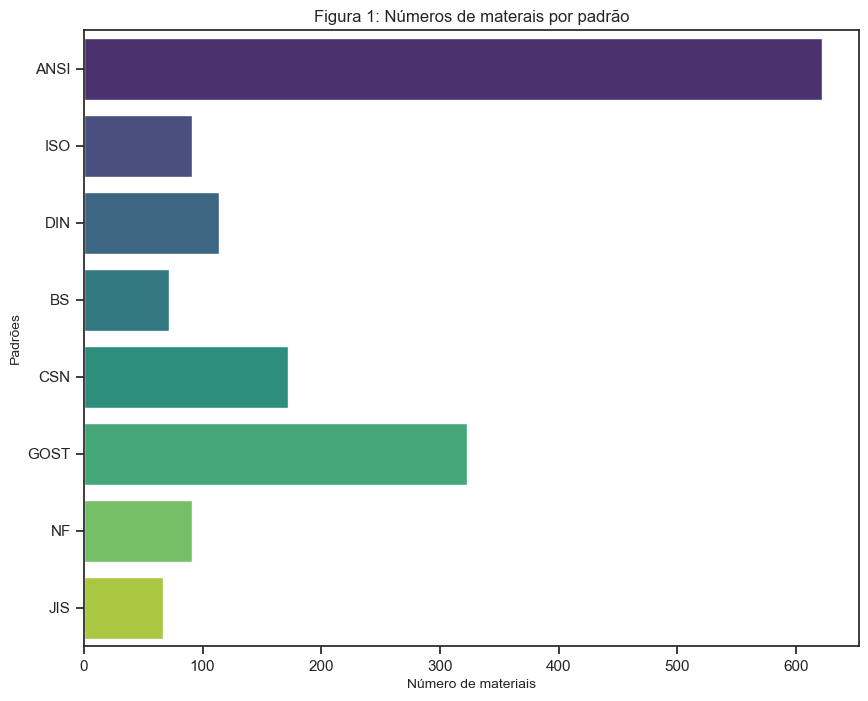

In [102]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (10,8))

sns.countplot(data = df_material, y = 'Std', palette = 'viridis')

ax.set_title('Figura 1: Números de materais por padrão', fontsize = 12)
ax.set_xlabel('Número de materiais', fontsize = 10)
ax.set_ylabel('Padrões', fontsize = 10)

plt.show()

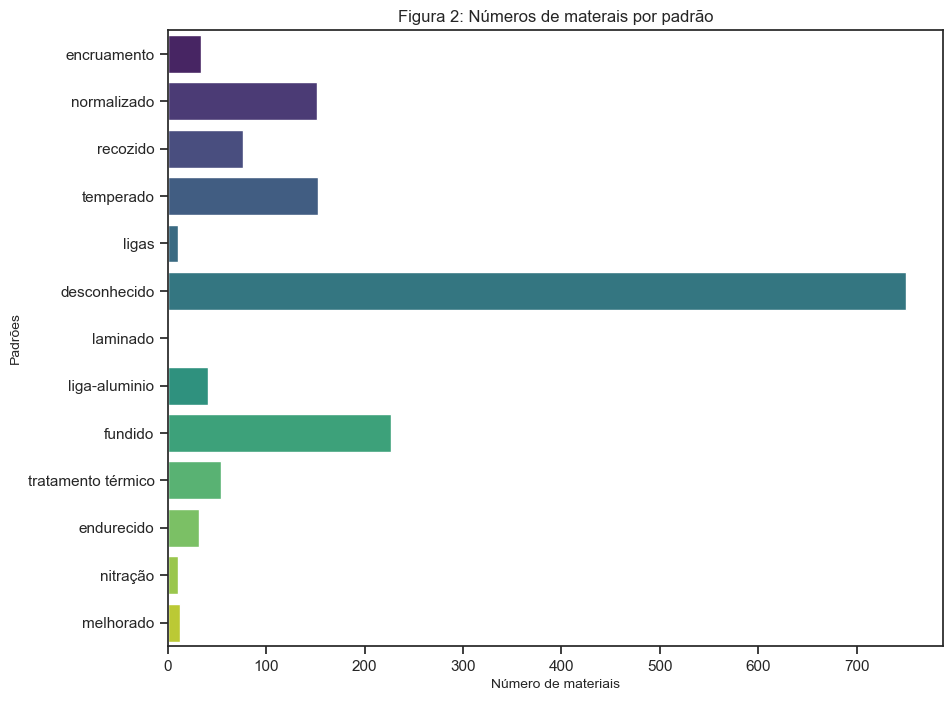

In [105]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (10,8))

sns.countplot(data = df_material, y = 'Tratamento', palette = 'viridis')

ax.set_title('Figura 2: Números de materais por padrão', fontsize = 12)
ax.set_xlabel('Número de materiais', fontsize = 10)
ax.set_ylabel('Padrões', fontsize = 10)

plt.show()

In [106]:
classe =[]

for i in range(len(df_material['Tratamento'])):
    if df_material['Tratamento'][i] == 'desconhecido':
        classe.append('0') 
    elif df_material['Tratamento'][i] == 'fundido':
        classe.append('1') 
    elif df_material['Tratamento'][i] == 'temperado':
        classe.append('2') 
    elif df_material['Tratamento'][i] == 'normalizado':
        classe.append('3') 
    elif df_material['Tratamento'][i] == 'recozido':
        classe.append('4') 
    elif df_material['Tratamento'][i] == 'tratamento térmico':
        classe.append('5') 
    elif df_material['Tratamento'][i] == 'liga-aluminio':
        classe.append('6') 
    elif df_material['Tratamento'][i] == 'encruamento':
        classe.append('7') 
    elif df_material['Tratamento'][i] == 'endurecido':
        classe.append('8') 
    elif df_material['Tratamento'][i] == 'melhorado':
        classe.append('9') 
    elif df_material['Tratamento'][i] == 'ligas':
        classe.append('10') 
    elif df_material['Tratamento'][i] == 'nitração':
        classe.append('11') 
    else:
        classe.append('12')

df_material['classe_nome'] = classe

In [107]:
df_material['Sy'] = df_material['Sy'].str.replace(' max', '').astype(int)
df_material.drop_duplicates(keep='first', inplace = True)
df_material.fillna(0, inplace=True)

In [108]:
df_material_tratado = df_material
df_base = df_material

In [109]:
df_material_tratado['Material'] = df_material_tratado[['Std', 'Material']].fillna('').agg(' '.join, axis = 1)
df_material_tratado.drop(['Desc','ID', 'Tratamento', 'Std'], axis = 1, inplace = True)

df_material_tratado.head(5)

,Material,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,HV,classe_nome
0,ANSI Steel SAE 1015,421,314,39.0,126.0,207000,79000,0.3,7860,0.0,0.0,7
1,ANSI Steel SAE 1015,424,324,37.0,121.0,207000,79000,0.3,7860,0.0,0.0,3
2,ANSI Steel SAE 1015,386,284,37.0,111.0,207000,79000,0.3,7860,0.0,0.0,4
3,ANSI Steel SAE 1020,448,331,36.0,143.0,207000,79000,0.3,7860,0.0,0.0,7
4,ANSI Steel SAE 1020,441,346,35.8,131.0,207000,79000,0.3,7860,550.0,0.0,3


In [110]:
print(len(df_material_tratado))
print(df_material_tratado['Material'].value_counts())

1552
Material
GOST Steel 45 GOST 1050-88       9
GOST Steel 60 GOST 1577-93       6
GOST Steel 55 GOST 1577-93       6
GOST Steel 50 GOST 1577-93       6
GOST Steel 45 GOST 1577-93       6
                                ..
ANSI Magnesium Alloy HM21A-T8    1
ISO EN 11SMn30                   1
ISO EN 10S2O                     1
ISO EN 35S20                     1
DIN DIN St70-2                   1
Name: count, Length: 1236, dtype: int64


Análise estatística dados dados

In [111]:
df_numeros = df_material_tratado
df_numeros.drop(['Material'], axis = 1, inplace=True)
df_numeros = df_numeros.set_index('classe_nome')
df_numeros.head(5)

,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,HV
classe_nome,,,,,,,,,,
7,421,314,39.0,126.0,207000,79000,0.3,7860,0.0,0.0
3,424,324,37.0,121.0,207000,79000,0.3,7860,0.0,0.0
4,386,284,37.0,111.0,207000,79000,0.3,7860,0.0,0.0
7,448,331,36.0,143.0,207000,79000,0.3,7860,0.0,0.0
3,441,346,35.8,131.0,207000,79000,0.3,7860,550.0,0.0


In [112]:
df_corr_pearson = df_numeros.corr()

In [113]:
df_corr_pearson

,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,HV
Su,1.000000,0.957244,-0.212676,0.402712,0.594348,0.254508,-0.239663,0.407995,0.151894,0.177729
Sy,0.957244,1.000000,-0.337007,0.382471,0.472434,0.179293,-0.190256,0.273860,0.156312,0.183353
A5,-0.212676,-0.337007,1.000000,-0.050868,0.075470,0.194725,0.255540,0.290357,-0.224344,-0.212291
Bhn,0.402712,0.382471,-0.050868,1.000000,0.183929,0.243444,-0.116982,0.052230,-0.089093,-0.149759
E,0.594348,0.472434,0.075470,0.183929,1.000000,0.279431,-0.446692,0.716853,0.105413,0.103586
G,0.254508,0.179293,0.194725,0.243444,0.279431,1.000000,-0.108699,0.222848,-0.034934,-0.030485
mu,-0.239663,-0.190256,0.255540,-0.116982,-0.446692,-0.108699,1.000000,-0.400175,-0.333126,-0.246923
Ro,0.407995,0.273860,0.290357,0.052230,0.716853,0.222848,-0.400175,1.000000,0.105297,0.096887
pH,0.151894,0.156312,-0.224344,-0.089093,0.105413,-0.034934,-0.333126,0.105297,1.000000,0.867730
HV,0.177729,0.183353,-0.212291,-0.149759,0.103586,-0.030485,-0.246923,0.096887,0.867730,1.000000


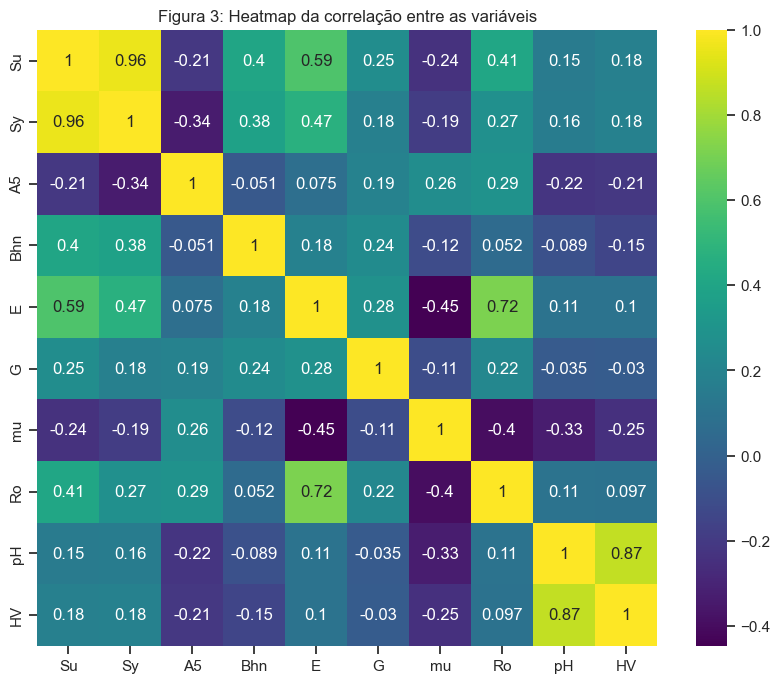

In [115]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize=(10,8))

sns.heatmap(df_corr_pearson, cmap = 'viridis', annot = True)

ax.set_title('Figura 3: Heatmap da correlação entre as variáveis', fontsize = 12)

plt.show()

teste de hipóteses

In [116]:
res = stt.normaltest(df_numeros)

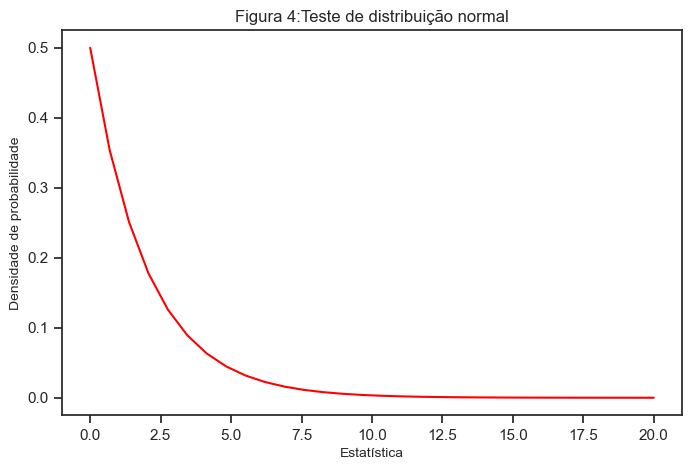

In [119]:
dist = stt.chi2(df=2)
stat_vals = np.linspace(0, 20, 30)
pdf = dist.pdf(stat_vals)

fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(x = stat_vals, y = pdf, color = 'red')

ax.set_title("Figura 4:Teste de distribuição normal", fontsize = 12)
ax.set_xlabel("Estatística", fontsize = 10 )
ax.set_ylabel("Densidade de probabilidade", fontsize = 10)

plt.show()

ValueError: Could not interpret input 'Tratamento'

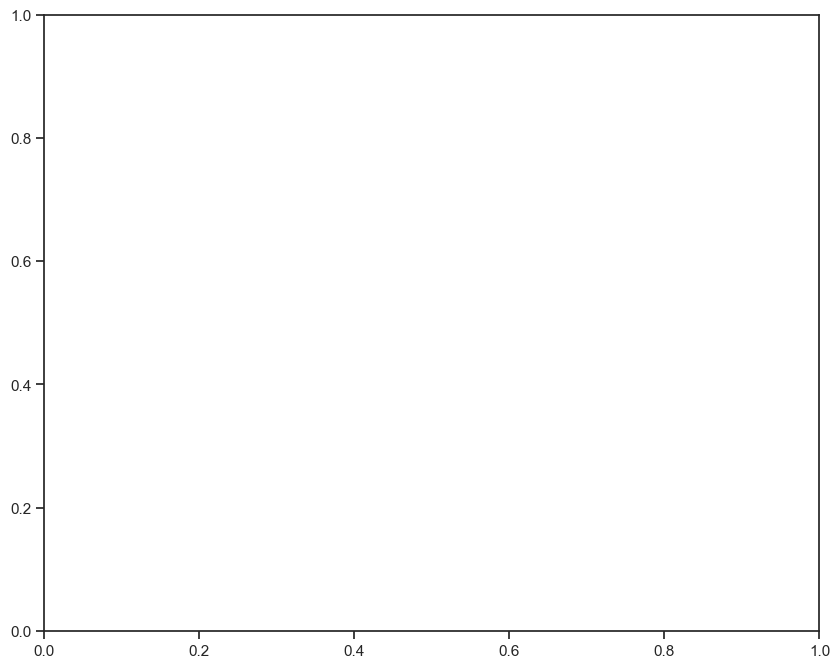

In [127]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (10,8))

sns.boxplot(data = df_material, x = 'E', y = 'Tratamento',
             palette = 'viridis', width = 0.6,
             showcaps = True, flierprops = {"marker": "10"},
             medianprops = {"color": "coral"})


ax.set_xlabel('Módulo de Young (MPA)', fontsize = 10)
ax.set_ylabel('Tratamento', fontsize = 10)
ax.set_title('Figure 4: Boxplot do módulo de Young', fontsize = 12)

plt.show()

In [ ]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (8,8))

sns.boxplot(data = df_material,
            x = 'Su', y = 'Tratamento',
             palette = 'viridis', width = 0.6,
             showcaps = True, flierprops = {"marker": "*"},
             medianprops = {"color": "coral"})

ax.set_xlabel('Tensão de ruptura(MPA)', fontsize = 10)
ax.set_ylabel('Tratamento térmico', fontsize = 10)
ax.set_title('Figure 5: Boxplot Tensão de ruptura', fontsize = 12)

plt.show()

In [ ]:
df_material['Sy'] = df_material['Sy'].str.replace(' max', '').astype(int)

In [ ]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (8,8))

sns.boxplot(data = df_material,
            x = 'Sy', y = 'Tratamento',
             palette = 'viridis', width = 0.6,
             showcaps = True, flierprops = {"marker": "*"},
             medianprops = {"color": "coral"})

ax.set_xlabel('Tensão de deformação (MPA)', fontsize = 10)
ax.set_ylabel('Tratamento térmico', fontsize = 10)
ax.set_title('Figura 6:Boxplot tensão de deformação', fontsize = 12)

plt.show()

In [ ]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (8,8))

sns.boxplot(data = df_material,
            x = 'A5', y = 'Tratamento',
             palette = 'viridis', width = 0.6,
             showcaps = True, flierprops = {"marker": "*"},
             medianprops = {"color": "coral"})

ax.xaxis.grid(True)
ax.set(xlabel = 'Deformação máxima (%)')
ax.set(ylabel = 'Tratamento térmico')
ax.set(title = 'Boxplot deformação')

plt.show()

In [ ]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (8,8))

sns.boxplot(data = df_material,
            x = 'Ro', y = 'Tratamento',
             palette = 'viridis', width = 0.6,
             showcaps = True, flierprops = {"marker": "*"},
             medianprops = {"color": "coral"})

ax.xaxis.grid(True)
ax.set(xlabel = 'Densidade da liga (kgm-3)')
ax.set(ylabel = 'Tratamento térmico')
ax.set(title = 'Boxplot densidade')

plt.show()

In [ ]:
sns.set_theme(style = 'dark')

sns.pairplot(df_material, hue = 'Tratamento', corner=True)

plt.show()

In [ ]:
#teste de normalidade shapirowilkes
rest = stt.shapiro(df_numeros)

In [ ]:
rest.pvalue

Tratando os outliers

In [ ]:
#IQR metodo

# para a tensão de ruptura Su 
quantil1, quantil3 = np.percentile(df_material_tratado.Su, [25,75])
quantil1sy, quantil3sy = np.percentile(df_material_tratado.Sy, [25,75])


print('Su: ',quantil1, quantil3, 'Sy: ', quantil1sy, quantil3sy)

In [ ]:
IQR_valorsu = quantil3-quantil1
IQR_valorsy = quantil3sy-quantil1sy


lsu = quantil1-(1.5*IQR_valorsu)
asu = quantil3+(1.5*IQR_valorsu)

lsy = quantil1sy-(1.5*IQR_valorsy)
asy = quantil3sy+(1.5*IQR_valorsy)


print('Su: ', IQR_valorsu, lsu, asu)
print('Sy: ', IQR_valorsy, lsy, asy)

In [ ]:
#separando os outliers
df_material_l = df_material_tratado[(df_material_tratado['Su'] >= lsu) & (df_material_tratado['Su'] <= asu) &
                                    (df_material_tratado['Sy'] >= lsy) & (df_material_tratado['Sy'] <= asy)] 
print(len(df_material_l))
df_material_l.head(3)

In [ ]:
sns.set_theme(style='darkgrid')

f, axes = plt.subplots(2,2, figsize=(18,10))

f.suptitle('Boxplot da variaveis de propriedades mecânicas')

sns.boxplot(data = df_material_l, y='Su', ax=axes[0,0])
sns.boxplot(data = df_material_l, y='Sy', ax=axes[0,1])
sns.boxplot(data = df_material_l, y='E', ax=axes[1,0])
sns.boxplot(data = df_material_l, y='Ro', ax=axes[1,1])

plt.show()

In [ ]:
#transformação box-cox
xt, lmbda = stt.boxcox(df_material_l.Su)
xt1, lmbda1 = stt.boxcox(df_material_l.Sy)

In [ ]:
nrest= stt.shapiro(xt)
print(nrest)

In [ ]:
nrest2=stt.shapiro(xt1)
print(nrest2)

In [ ]:
fig = plt.figure()
ax2= fig.add_subplot(212)
prob = stt.probplot(xt, dist=stt.norm, plot=ax2)
plt.show()

In [ ]:
fig = plt.figure()
ax2= fig.add_subplot(212)
prob = stt.probplot(xt1, dist=stt.norm, plot=ax2)
plt.show()

In [129]:
#salvando o arquivo para machine learning
df_material_tratado.to_csv('df_metal_PCA.csv', index=False)
df_base.to_csv('df_metal_ML.csv', index = False)